In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Membaca dataset
df = pd.read_csv(r'C:\Users\User\Downloads\heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# Menampilkan 5 baris pertama dan terakhir
print(df.head())
print(df.tail())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
      id

In [4]:
# Informasi tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [5]:
# Cek nilai missing
missing_values = df.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
# Cek outliers dengan IQR
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
print(outliers)

{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num': 0}


In [7]:
#Menghitung dan menampilkan mean, median, mode, standar deviasi, variansi, skewness, dan kurtosis untuk kolom numerik.
desc_stats = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
mode_values = df[numerical_columns].mode().iloc[0]  
print(desc_stats)
print('Mode:', mode_values)

                  id        age    trestbps          chol      thalch  \
mean      460.500000  53.510870  132.132404    199.130337  137.545665   
median    460.500000  54.000000  130.000000    223.000000  140.000000   
std       265.725422   9.424685   19.066070    110.780810   25.926276   
var     70610.000000  88.824691  363.515007  12272.387943  672.171813   
skew        0.000000  -0.195994    0.213334     -0.613836   -0.211119   
kurt       -1.200000  -0.382930    2.958664      0.062273   -0.479725   

         oldpeak        ca       num  
mean    0.878788  0.676375  0.995652  
median  0.500000  0.000000  1.000000  
std     1.091226  0.935653  1.142693  
var     1.190775  0.875447  1.305748  
skew    1.041427  1.165978  0.968880  
kurt    1.127069  0.199498 -0.104325  
Mode: id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64


In [13]:
#Menghitung korelasi antar variabel numerik.
import pandas as pd
import numpy as np 

df = pd.read_csv(r'C:\Users\User\Downloads\heart_disease_uci.csv')

numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
correlation_matrix = df[numeric_columns].corr()

correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.abs().max().max()

highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

print("Pasangan variabel dengan korelasi tertinggi:", highest_corr_pair)
print("Nilai korelasi tertinggi:", max_corr)

Pasangan variabel dengan korelasi tertinggi: ('ca', 'num')
Nilai korelasi tertinggi: 0.5162163234345344


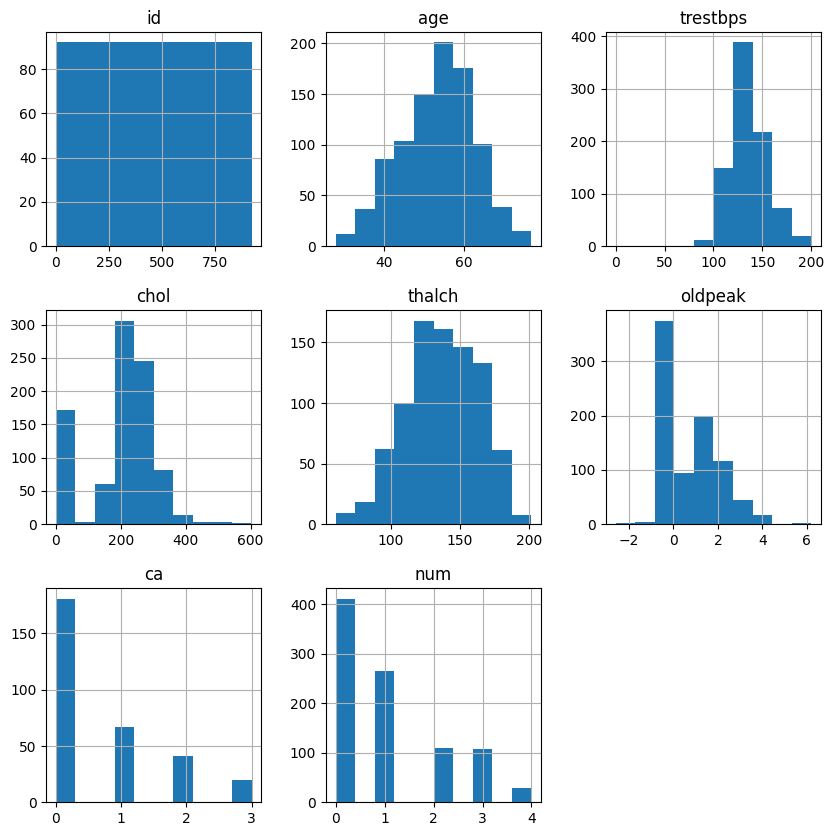

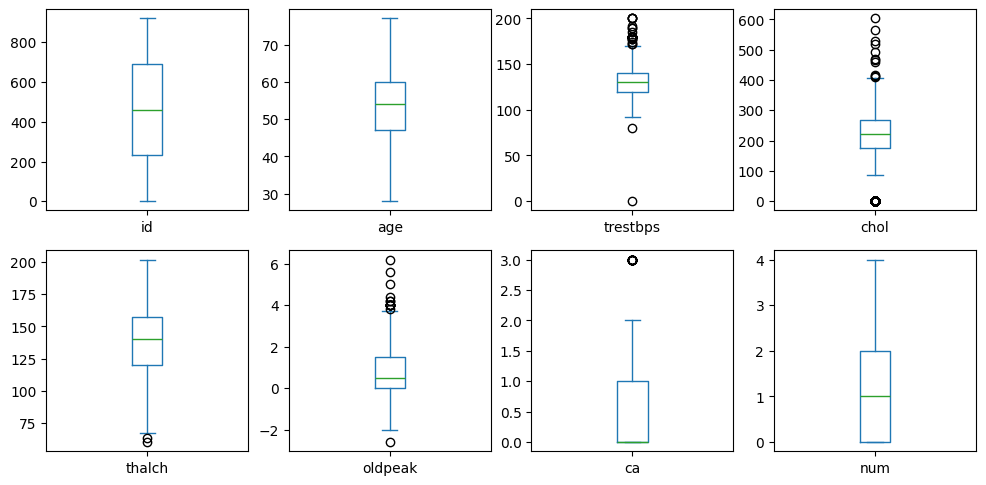

In [8]:
#Membuat histogram dan box plot untuk setiap variabel numerik.
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df[numerical_columns].hist(figsize=(10, 10))
plt.show()

# Boxplot
df[numerical_columns].plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

Pasangan variabel dengan korelasi tertinggi: ('ca', 'num')
Nilai korelasi tertinggi: 0.5162163234345344


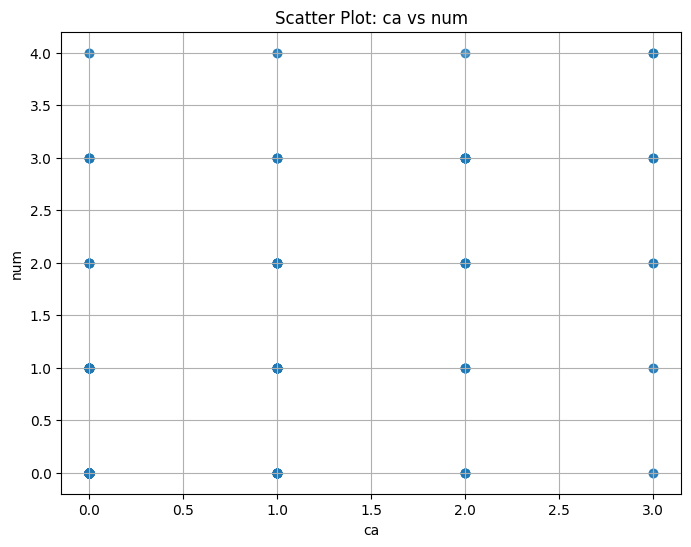

In [14]:
#Membuat scatter plot untuk pasangan variabel yang memiliki korelasi tinggi.
import numpy as np
import matplotlib.pyplot as plt

# Kolom numerik yang relevan
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Menghitung matriks korelasi
correlation_matrix = df[numeric_columns].corr()

# Menghitung nilai korelasi absolut tertinggi, kecuali diagonal
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.abs().max().max()

# Mendapatkan pasangan variabel dengan korelasi tertinggi
highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

# Menampilkan pasangan variabel dan nilai korelasi tertinggi
print("Pasangan variabel dengan korelasi tertinggi:", highest_corr_pair)
print("Nilai korelasi tertinggi:", max_corr)

# Membuat scatter plot untuk pasangan variabel dengan korelasi tertinggi
plt.figure(figsize=(8, 6))
plt.scatter(df[highest_corr_pair[0]], df[highest_corr_pair[1]], alpha=0.5)
plt.title(f'Scatter Plot: {highest_corr_pair[0]} vs {highest_corr_pair[1]}')
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.grid(True)
plt.show()


Laporan Singkat

Dari latihan di atas saya melakukan pengolahan dataset kesehatan jantung. Berikut informasi dataset di atas:
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns): 
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Dapat dilihat bahwa dataset yang diolah mengandung tipe data string dan integer yang artinya terdapat data kategorikal dan numerik.
Pada data numerik dilakukan banyak operasi seperti menghitung mean, median, mode, standar deviasi, variansi, skewness, kurtosis, dan korelasi antar variabel numerik. Membuat histogram dan box plot untuk setiap variabel numerik, serta membuat scatter plot untuk pasangan variabel yang memiliki korelasi tinggi. 
Dataset yang diolah juga memiliki nilai missing dan outliers.
Berikut nilai missingnya:

Berikut nilai missingnya: 
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Berikut Outliersnya:
{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num':

Pasangan variabel yang memiliki korelasi tertinggi adalah ca dan num dengan nilai korelasi 0.5162163234345344.
Setiap kategori dari ca memiliki beberapa kategori dari num, yang menunjukkan bahwa distribusi antara variabel ini tidak menunjukkan hubungan linier langsung. Namun, num meningkat seiring dengan peningkatan ca. 